In [70]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
## Parameter
J = 1
kB = 1
# beta = (1/(kB*T))

In [71]:
def transfer_matrix(T, B):
    T = np.array([[np.exp((1/(kB*T)) * J + (1/(kB*T)) * B), np.exp(-(1/(kB*T)) * J)],
                      [np.exp(-(1/(kB*T)) * J), np.exp((1/(kB*T)) * J - (1/(kB*T)) * B)]]
                    )
    return T

M = transfer_matrix(10, 5)
print("Transfer matrix is :")
print(M)

Transfer matrix is :
[[1.8221188  0.90483742]
 [0.90483742 0.67032005]]


In [79]:
def ev(T, B):
    v1 = np.exp((1/(kB*T)) * J) * (np.cosh((1/(kB*T)) * B) - np.sqrt((np.sinh((1/(kB*T)) * B)**2) + np.exp(-4 * (1/(kB*T)) * J)))
    v2 = np.exp((1/(kB*T)) * J) * (np.cosh((1/(kB*T)) * B) + np.sqrt((np.sinh((1/(kB*T)) * B)**2) + np.exp(-4 * (1/(kB*T)) * J)))
    return np.array([v1,v2])

def ev_exact(T, B):
    return np.linalg.eigvalsh(transfer_matrix(T, B))

def ev_diff(T, B):
    evdiff = ev(T, B) - ev_exact(T, B)
    return evdiff

print("Eigenvalue of the transfer matrix are",ev(10, 5))
print("Eigenvalue are",ev_exact(10, 5))
print("The difference are",ev_diff(10, 5))


Eigenvalue of the transfer matrix are [0.17365668 2.31878217]
Eigenvalue are [0.17365668 2.31878217]
The difference are [-8.32667268e-17  4.44089210e-16]


In [82]:
def par(T, B, N):
    p = np.exp((1/(kB*T)) * J) * (np.cosh((1/(kB*T)) * B) + np.sqrt((np.sinh((1/(kB*T)) * B)**2) + np.exp(-4 * (1/(kB*T)) * J)))
    return p**N

def par_exact(T, B, N):
    a = transfer_matrix(T, B)
    b = np.copy(a)
    for i in range(N - 1):
        a = np.dot(a, b)
    return np.trace(a)

def par_diff_radio(T, B, N):
    diff = (par(T, B, N) - par_exact(T, B, N)) / par_exact(T, B, N)
    return diff

print("T = 10, B = 5, N = 10")
print("Calculate :", par(10, 5, 10))
print("Exact :", par_exact(10, 5, 10))
print("Difference ratio is", par_diff_radio(10, 5, 10))
print()
print("T = 10, B = 5, N = 100")
print("Calculate :", par(10, 5, 100))
print("Exact :", par_exact(10, 5, 100))
print("Difference ratio is", par_diff_radio(10, 5, 100))

T = 10, B = 5, N = 10
Calculate : 4493.652889675443
Exact : 4493.652889700372
Difference ratio is -5.547658082967374e-12

T = 10, B = 5, N = 100
Calculate : 3.35733922759931e+36
Exact : 3.357339227599228e+36
Difference ratio is 2.443932890824778e-14


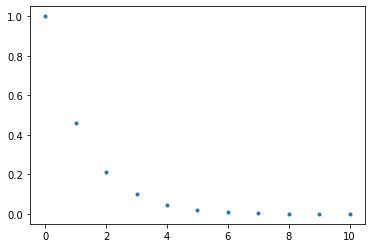

In [98]:
def S0Sj(T, B, N):
    S = np.array([0.0] * (N + 1))
    for i in range(N + 1):
        S[i] = np.tanh(B/T)**i
    return S

ss = S0Sj(10, 5, 10)
plt.plot(ss, '.')

In [120]:
def S0Sj_plot(T, B, N):
    k = int(N/2)
    ssp = np.array([0.0] * k)
    for j in range(k):
        ssp[j] = np.tanh(B/T)**j
    return ssp 

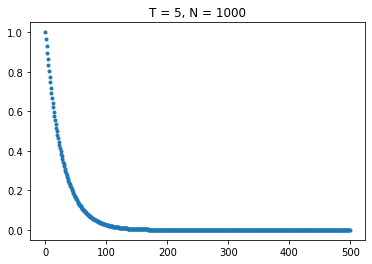

In [132]:
s_plot = S0Sj_plot(1, 2, 1000)
plt.title("T = 5, N = 1000")
plt.plot(s_plot, '.')

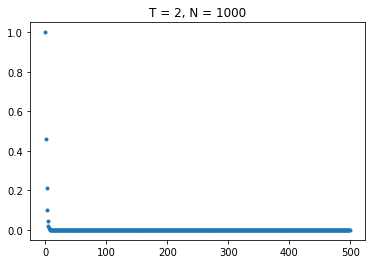

In [128]:
s_plot = S0Sj_plot(2, 2, 1000)
plt.title("T = 2, N = 1000")
plt.plot(s_plot, '.')

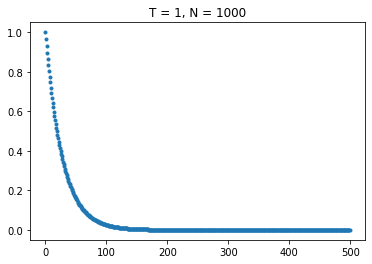

In [127]:
s_plot = S0Sj_plot(1, 2, 1000)
plt.title("T = 1, N = 1000")
plt.plot(s_plot, '.')

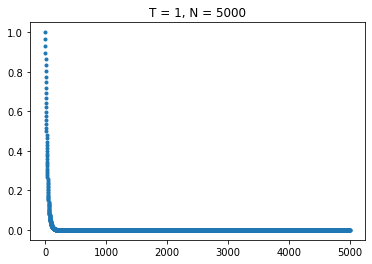

In [134]:
s_plot = S0Sj_plot(1, 2, 10000)
plt.title("T = 1, N = 5000")
plt.plot(s_plot, '.')

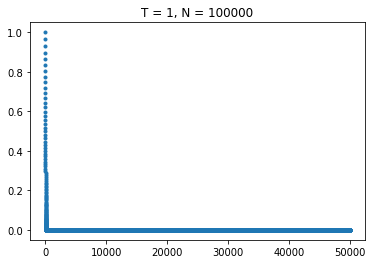

In [133]:
s_plot = S0Sj_plot(1, 2, 100000)
plt.title("T = 1, N = 100000")
plt.plot(s_plot, '.')